경사 하강법(Gradient Descent)  
기울기를 너무 크게 잡으면 오차가 커지고 기울기를 너무 작게잡아도 오차가 커진다.  
기울기를 무한대로 키우면 오차도 무한대로 커지고 기울기를 무한대로 작게해도 오차는 무한대로 커진다.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 학습 데이터를 만든다.
data = [[2, 81], [4, 93], [6, 91], [8, 97]] # [공부한 시간(x), 실제 성적(y)]
xData = [i[0] for i in data] # 공부한 시간
yData = [i[1] for i in data] # 시험 성적 => 실제값

In [3]:
# 기울기 a와 y절편 b를 임의로 정한다.
# 기울기의 범위는 0 ~ 10 사이이며, y절편의 범위는 0 ~ 100 사이에서 임의로 변하게 한다.
# random_uniform(): tensorflow에서 난수를 발생시키는 함수
# random_uniform([난수의 개수(차원)], 난수의 최소값, 난수의 최대값, dtype=난수의 데이터 타입, seed=숫자)
# 난수 발생시 seed를 지정하면 항상 일정한 배열의 난수가 발생된다.
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float32))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float32))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('a: {}, b: {}'.format(sess.run(a), sess.run(b)))

a: [4.5846915], b: [80.13844]


In [4]:
# 예측 성적(y)을 얻기위한 가설(수식)을 만든다.
y = a * xData + b

In [5]:
# tensorflow에서 실행할 RMSE(평균 제곱근 오차) 수식(오차(비용) 함수)을 만든다.
# tf.square(y - yData) => 예측 성적(y)과 실제 성적(yData)의 편차의 제곱을 계산한다. => 오차가 무조건 양수로 나오게 한다.
# tf.reduce_mean(tf.square(y - yData)) => 예측 성적과 실제 성적의 편차의 제곱에 대한 평균을 계산한다.
# tf.sqrt(tf.reduce_mean(tf.square(y - yData))) => 예측 성적과 실제 성적의 편차의 제곱에 대한 평균의 제곱근을 계산한다.
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - yData)))

In [6]:
# 경사 하강법 알고리즘을 이용해서 RMSE를 최소로 하는 값을 찾는 수식을 만든다.
# 학습율을 정한다.
learning_rate = 0.1
# GradientDescentOptimizer(학습율): 학습율에 따른 경사 하강 알고리즘을 계산한다.
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

학습을 시킨다.

In [7]:
import time
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(3001):
    sess.run(gradient_descent)
    if i % 200 == 0:
        # Epoch => 1번 학습을 의미하는 용어, RMSE, 기울기 => 2.3에 가까워진다., y절편 => 79에 가까워진다.
        # print('Epoch: %4d, RMSE: %7.4f, 기울기: %7.4f, y절편: %7.4f' % (i, sess.run(rmse), sess.run(a), sess.run(b)))
        # print('Epoch: {}, RMSE: {}, 기울기: {}, y절편: {}'.format(i, sess.run(rmse), sess.run(a)[0], sess.run(b)[0]))
        print('Epoch: {0:4d}, RMSE: {1:7.4f}, 기울기: {2:7.4f}, y절편: {3:7.4f}'.format(i, sess.run(rmse), sess.run(a)[0], 
                                                                                   sess.run(b)[0]))
        time.sleep(0.25)

Epoch:    0, RMSE: 48.5280, 기울기:  7.9398, y절편: 97.5730
Epoch:  200, RMSE:  5.1574, 기울기:  0.5443, y절편: 89.4773
Epoch:  400, RMSE:  3.4855, 기울기:  1.4948, y절편: 83.8051
Epoch:  600, RMSE:  2.9645, 기울기:  2.0133, y절편: 80.7111
Epoch:  800, RMSE:  2.8901, 기울기:  2.2060, y절편: 79.5607
Epoch: 1000, RMSE:  2.8819, 기울기:  2.2696, y절편: 79.1816
Epoch: 1200, RMSE:  2.8811, 기울기:  2.2902, y절편: 79.0588
Epoch: 1400, RMSE:  2.8810, 기울기:  2.2968, y절편: 79.0190
Epoch: 1600, RMSE:  2.8810, 기울기:  2.2990, y절편: 79.0062
Epoch: 1800, RMSE:  2.8810, 기울기:  2.2997, y절편: 79.0020
Epoch: 2000, RMSE:  2.8810, 기울기:  2.2999, y절편: 79.0006
Epoch: 2200, RMSE:  2.8810, 기울기:  2.2999, y절편: 79.0006
Epoch: 2400, RMSE:  2.8810, 기울기:  2.2999, y절편: 79.0006
Epoch: 2600, RMSE:  2.8810, 기울기:  2.2999, y절편: 79.0006
Epoch: 2800, RMSE:  2.8810, 기울기:  2.2999, y절편: 79.0006
Epoch: 3000, RMSE:  2.8810, 기울기:  2.2999, y절편: 79.0006


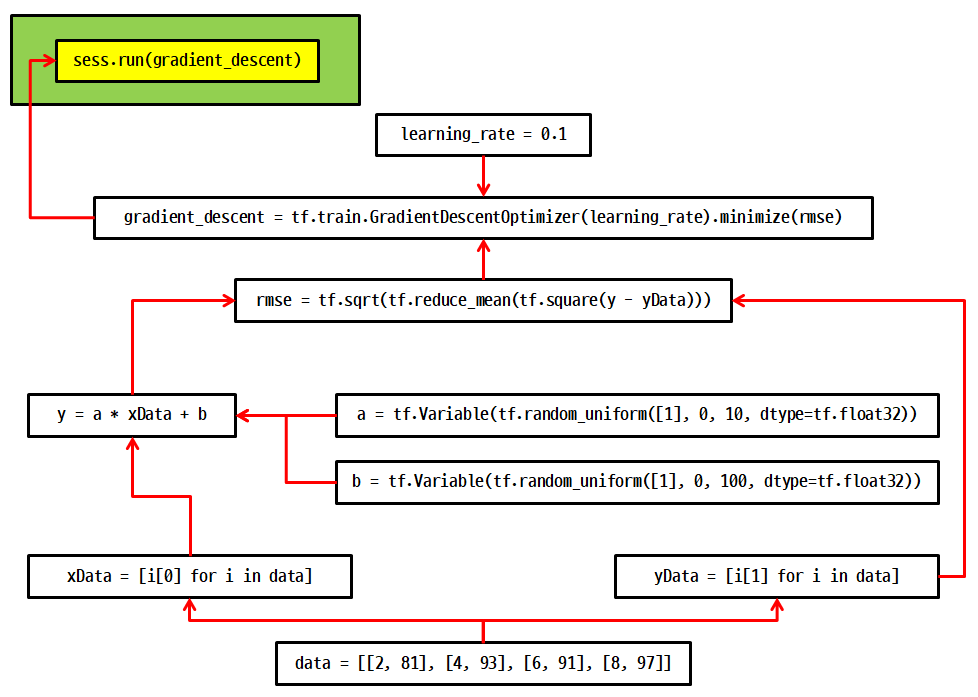

In [10]:
from IPython.display import Image
Image('./numpyImage/gradient_descent.png', width=1000)